<a href="https://colab.research.google.com/github/oonya/MyPckMachineLearning/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, GlobalAveragePooling2D,Input
import os.path,sys
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks
from keras.applications import VGG16
from keras.optimizers import Adam

base_dir = "drive/My Drive/picturesForMachineLearning"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

classes = ['person_img', 'animal_img']
classes_num = 2

N_CATEGORIES  = 2
IMAGE_SIZE = 256
BATCH_SIZE = 16

#下から数えて指差しポーズの先生で制限
# ちゃんと変更するTODO
NUM_TRAINING = 51+50# person + animal
NUM_VALIDATION = 16+16# person + animal

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(N_CATEGORIES, activation='softmax')(x)
model = Model(inputs=conv_base.input, outputs=predictions)

for layer in conv_base.layers:
    layer.trainable = False
model.compile(optimizer=Adam(lr=5e-4), loss='binary_crossentropy',metrics=['accuracy'])

# model.summary()



train_datagen = ImageDataGenerator(
   rescale=1.0 / 255,)

test_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
)

train_generator = train_datagen.flow_from_directory(
   train_dir,
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='binary',
   shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
   valid_dir,
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='binary',
   shuffle=True
)


# 時間がかかる場合はこれでバックアップをとる
# from keras.callbacks import CSVLogger
# from keras.callbacks import ModelCheckpoint

# google_drive_dir = 'drive/My Drive'
# base_file_name = 'test1'
# # Google Driveに逐次モデルのスナップショットを保存
# checkpointer = ModelCheckpoint(filepath = google_drive_dir + base_file_name + '.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True, monitor='val_acc', mode='max')
# # Google Driveでは学習終了まで反映されない。localに保存
# csv_logger = CSVLogger('./xxx.log')

# history = model.fit_generator(train_generator,
#    steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
#    epochs=100,
#    verbose=1,
#    validation_data=validation_generator,
#    validation_steps=NUM_VALIDATION//BATCH_SIZE,
#    callbacks=[csv_logger, checkpointer],
#    )


history = model.fit_generator(train_generator,
   steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
   epochs=100,
   verbose=1,
   validation_data=validation_generator,
   validation_steps=NUM_VALIDATION//BATCH_SIZE,
   )

58892288/58889256 [==============================] - 2s 0us/step
Found 101 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
6/6 [==============================] - 68s 11s/step - loss: 0.7296 - accuracy: 0.6118 - val_loss: 0.7140 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - 1s 117ms/step - loss: 0.7089 - accuracy: 0.4706 - val_loss: 0.7148 - val_accuracy: 0.5000
Epoch 3/100
6/6 [==============================] - 1s 115ms/step - loss: 0.7032 - accuracy: 0.5176 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 4/100
6/6 [==============================] - 1s 114ms/step - loss: 0.6990 - accuracy: 0.5059 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 1s 120ms/step - loss: 0.6964 - accuracy: 0.5294 - val_loss: 0.6956 - val_accuracy: 0.5625
Epoch 6/100
6/6 [==============================] - 1s 118ms/step - loss: 0.6949 - accuracy: 0.5059 - val_loss: 0.6952 - val_accuracy: 0.5312
Epoch 7/100
6/6 [==============================] - 1s 114ms/step - loss: 0.6940 - accuracy: 0.4471 - val_loss: 0.6941 - val_accuracy: 0.5312
Epoch 8/100
6/

In [ ]:

model.save(filepath='/content/drive/My Drive/VGG16_MyModel.h5', save_format='h5')
!ls 

# !cp VGG16_MyModel.h5  '/content/drive/My Drive/saveFolderForMachineLearning'
# !cp  '/content/drive/My Drive/saveFolderForMachineLearning/VGG16_MyModel.h5' .

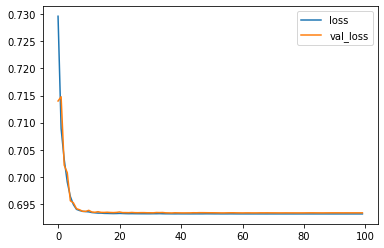

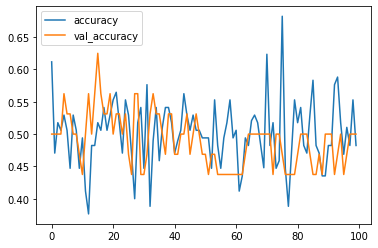

In [2]:
result = pd.DataFrame(history.history)
result[['loss', 'val_loss']].plot()
result[['accuracy', 'val_accuracy']].plot()

In [35]:
# import cv2
sample = cv2.imread('drive/My Drive/picturesForMachineLearning/train/animal_img/2.png')
# print(sample)
model.predict(sample)
# !ls 'drive/My Drive/picturesForMachineLearning/train'
!ls 'drive/My Drive'

ValueError: ignored

In [ ]:
# import keras
# from keras.datasets import mnist
# import matplotlib.pyplot as plt

# from keras.layers import Dense, GlobalAveragePooling2D,Input
# import os.path,sys
# from keras.models import Model
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import ImageDataGenerator
# import keras.callbacks
# from keras.applications import VGG16
# from keras.optimizers import Adam

# import tensorflow_datasets as tfds

# batch_size = 128
# num_classes = 10
# image_size = 160

# # the data, shuffled and split between train and test sets
# (raw_train, raw_test), metadata = tfds.load(
#     'cats_vs_dogs',
#     split=['train[:80%]', 'train[80%:]'],
#     with_info=True,
#     as_supervised=True,
# )